In [222]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
words=open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [224]:
len(words)

32033

In [225]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [226]:
def build_dataset(words):
    block_size=3
    X,Y=[], []
    for w in words:
       
    
        context=[0] * block_size
        for ch in w + '.':
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
            
            #print(''.join(itos[i] for i in context), '---->', itos[ix])
            context=context[1:] +[ix]
    
    X=torch.tensor(X)
    Y=torch.tensor(Y)
    print(X.shape,Y.shape)
    return X,Y
import random 
random.seed(42)
random.shuffle(words)
n1=int(0.8 * len(words))
n2=int(0.9 * len(words))

Xtr, Ytr =build_dataset(words[:n1])
Xdev, Ydev= build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


a=random.random()
print(a)

In [227]:
X.shape, X.dtype , Y.shape , Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [228]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [229]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [230]:
C = torch.randn((27,2))

In [231]:
C[3]  #.dtype

tensor([0.5980, 0.7668])

In [232]:
F.one_hot(torch.tensor(3), num_classes=27)    #.dtype

tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [233]:
F.one_hot(torch.tensor(3), num_classes=27).float() @ C

tensor([0.5980, 0.7668])

In [234]:
C[[5,6,7]]

tensor([[-1.9165,  1.0162],
        [ 1.2228, -0.5580],
        [ 0.5533, -1.1516]])

In [235]:
C[torch.tensor([5,6,7])]

tensor([[-1.9165,  1.0162],
        [ 1.2228, -0.5580],
        [ 0.5533, -1.1516]])

In [236]:
C[torch.tensor([5,6,7,7,7])]

tensor([[-1.9165,  1.0162],
        [ 1.2228, -0.5580],
        [ 0.5533, -1.1516],
        [ 0.5533, -1.1516],
        [ 0.5533, -1.1516]])

In [237]:
C[X]

tensor([[[ 0.1060, -1.0625],
         [ 0.1060, -1.0625],
         [ 0.1060, -1.0625]],

        [[ 0.1060, -1.0625],
         [ 0.1060, -1.0625],
         [-1.9165,  1.0162]],

        [[ 0.1060, -1.0625],
         [-1.9165,  1.0162],
         [ 0.8305, -0.3166]],

        ...,

        [[ 0.7234, -1.1049],
         [ 0.7234, -1.1049],
         [ 0.3618,  0.5678]],

        [[ 0.7234, -1.1049],
         [ 0.3618,  0.5678],
         [ 0.7234, -1.1049]],

        [[ 0.3618,  0.5678],
         [ 0.7234, -1.1049],
         [ 0.2222,  0.1605]]])

In [238]:
C[X].shape

torch.Size([228146, 3, 2])

In [239]:
X[13,2]

tensor(1)

In [240]:
C[X][13,2]

tensor([0.0382, 0.3167])

In [241]:
emb=C[X]
emb.shape

torch.Size([228146, 3, 2])

In [242]:
W1=torch.rand((6,100))
b1=torch.randn(100)


In [243]:
h=torch.tanh(emb.view(-1,6) @ W1 +b1)

In [244]:
h.shape

torch.Size([228146, 100])

In [245]:
h

tensor([[-0.9320, -0.9801, -0.9637,  ...,  0.0048, -0.9446, -0.7424],
        [-0.9016, -0.9748, -0.9654,  ..., -0.7492, -0.9970, -0.9083],
        [-0.3205, -0.9114, -0.9799,  ...,  0.8942, -0.7878,  0.8329],
        ...,
        [ 0.6359, -0.8326,  0.5686,  ...,  0.7887, -0.5498, -0.0417],
        [-0.1509, -0.7196, -0.5763,  ...,  0.9730, -0.3100,  0.6774],
        [ 0.5189, -0.6726,  0.9146,  ...,  0.9398,  0.2203,  0.8483]])

In [246]:
b1.shape

torch.Size([100])

# 32 , 100
   1 , 100

In [247]:
W2 =torch.randn(100,27)
b2=torch.randn(27)


In [248]:
logits = h @W2+b2

In [249]:
logits.shape

torch.Size([228146, 27])

In [250]:
counts=logits.exp()

In [251]:
prob=counts/counts.sum(1, keepdims=True)


In [252]:
prob.shape

torch.Size([228146, 27])

In [253]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [269]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,10),generator=g)
W1=torch.randn((30,300),generator=g)
b1=torch.randn(300,generator=g)
W2=torch.randn((300,27),generator=g)
b2=torch.randn(27,generator=g)
parameters= [C,W1,b1,W2,b2]

In [270]:
sum(p.nelement() for p in parameters)

17697

In [271]:
for p in parameters:
    p.requires_grad=True

In [272]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre


In [273]:
lri=[]
lossi=[]
stepi=[]

In [282]:

for i in range(200000):

    ix= torch.randint(0,Xtr.shape[0],(32,))
    emb = C[Xtr[ix]]  #(32,3,2)
    h=torch.tanh(emb.view(-1,30) @ W1 +b1)
    logits = h @W2+b2
    #counts=logits.exp()
    #prob=counts/counts.sum(1, keepdims=True)
    #loss= -prob[torch.arange(32),Y].log().mean()
    
    loss=F.cross_entropy(logits,Ytr[ix])
    #print(loss.item())
    for p in parameters:
        p.grad=None
    loss.backward()
   # lr=lrs[i]
    lr= 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data+= -lr* p.grad

    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
#print(loss.item())

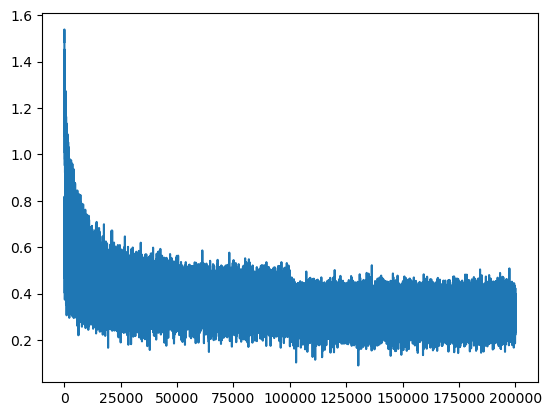

In [279]:
plt.plot(stepi,lossi)

In [280]:
emb = C[Xtr]  #(32,3,2)
h=torch.tanh(emb.view(-1,30) @ W1 +b1)
logits = h @W2+b2
loss=F.cross_entropy(logits,Ytr)
loss

tensor(2.1109, grad_fn=<NllLossBackward0>)

In [281]:
emb = C[Xdev]  #(32,3,2)
h=torch.tanh(emb.view(-1,30) @ W1 +b1)
logits = h @W2+b2
loss=F.cross_entropy(logits,Ydev)
loss

tensor(2.1547, grad_fn=<NllLossBackward0>)

In [263]:
# taring split, dev/validation split and test split
# 80 , 10 , 10  %

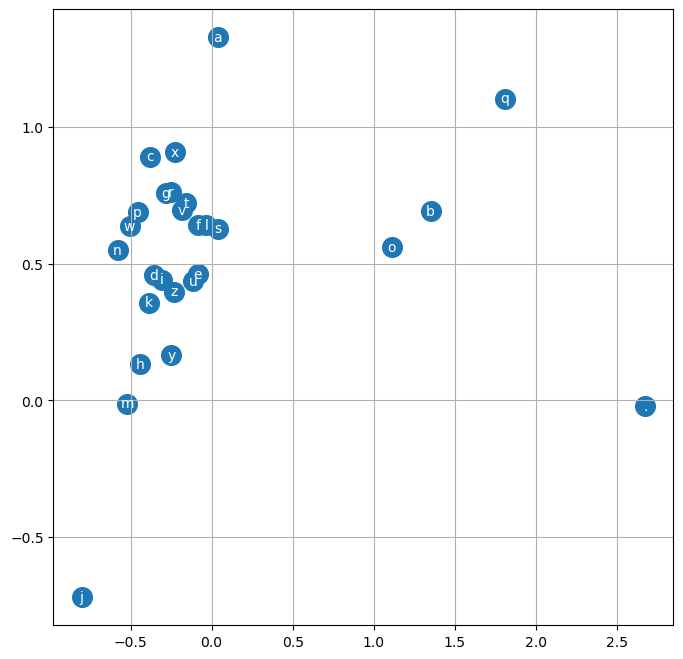

In [264]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')